# Vessel segmentation

In [71]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [72]:
data_path = "./data_labeled"
img1 = nib.load("./data_labeled/sub-000_ses-20110101_desc-angio_N4bfc_brain_mask.nii.gz")
mask1 = nib.load("./data_labeled/sub-000_segmentation.nii.gz")

In [73]:
data = img1.get_fdata()
mask_data = mask1.get_fdata()
data_masked = np.where(mask_data == 1, data, 0)

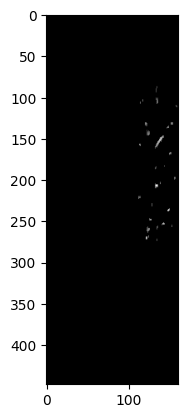

In [74]:
x = data_masked[300, :, :]
plt.imshow(x, cmap="gray")
plt.show()